In [131]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from arch import arch_model
import pandas as pd
import pandas_ta
import numpy as np
import os

data_folder = '.'

daily_df = pd.read_csv(os.path.join(data_folder, 'simulated_daily_data.csv')).dropna(axis=1)

daily_df['Date'] = pd.to_datetime(daily_df['Date'])

daily_df = daily_df.set_index('Date')

daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

daily_df 

,Open,High,Low,Close,Adj Close,Volume,log_ret
Date,,,,,,,
2014-09-17,116.466003,117.043503,113.105499,114.333504,114.333504,2.105680e+07,NaN
2014-09-18,114.214996,114.214996,103.276001,106.110001,106.110001,3.448320e+07,-0.074643
2014-09-19,106.025749,106.958748,96.133003,98.698998,98.698998,3.791970e+07,-0.072402
2014-09-20,98.668251,105.823998,97.470749,102.225998,102.225998,3.686360e+07,0.035111
2014-09-21,102.021248,103.106499,98.295250,99.705254,99.705254,2.658010e+07,-0.024968
...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520


In [132]:
intraday_5min_df = pd.read_csv(os.path.join(data_folder, 'simulated_5min_data.csv'))
intraday_5min_df = intraday_5min_df.loc[:, ~intraday_5min_df.columns.str.contains('^Unnamed')]
intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])
intraday_5min_df['date'] = intraday_5min_df['datetime'].dt.date
intraday_5min_df['date'] = pd.to_datetime(intraday_5min_df['date'])
intraday_5min_df = intraday_5min_df.set_index('datetime')
intraday_5min_df

,open,low,high,close,volume,date
datetime,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,2021-09-29
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,2021-09-29
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,2021-09-29
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,2021-09-29
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,2021-09-29
...,...,...,...,...,...,...
2023-09-20 10:40:00,6792.1025,6783.6000,6796.2500,6790.1375,41,2023-09-20
2023-09-20 10:45:00,6790.5575,6779.1000,6795.7500,6781.9175,42,2023-09-20
2023-09-20 10:50:00,6781.5475,6779.3750,6790.2500,6783.9050,44,2023-09-20


In [133]:
daily_df['variance'] = daily_df['log_ret'].rolling(180).var()
daily_df = daily_df['2020-01-01':].copy()

def predict_volatility(x):
    x_scaled = x * 100  # Rescale to improve numerical stability
    best_model = arch_model(y=x_scaled,
                            p=1,
                            q=3).fit(update_freq=5, disp='off')
    variance_forecast_scaled = best_model.forecast(horizon=1).variance.iloc[-1, 0]
    variance_forecast = variance_forecast_scaled / (100**2)

    return variance_forecast

daily_df['predictions'] = daily_df['log_ret'].rolling(180).apply(lambda x:predict_volatility(x))

daily_df
    

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2020-01-01,1798.723022,1813.582642,1793.736084,1800.043579,1800.043579,1.856566e+10,0.000914,0.001125,NaN
2020-01-02,1800.637817,1803.038818,1733.817505,1746.367554,1746.367554,2.080208e+10,-0.030273,0.001127,NaN
2020-01-03,1746.107178,1853.428833,1728.749023,1836.221069,1836.221069,2.811148e+10,0.050172,0.001139,NaN
2020-01-04,1836.343872,1856.846436,1827.378540,1852.664185,1852.664185,1.844427e+10,0.008915,0.001110,NaN
2020-01-05,1852.612915,1886.124268,1850.133911,1852.829346,1852.829346,1.972507e+10,0.000089,0.001106,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-14,6557.069336,6693.655762,6542.862793,6634.918457,6634.918457,1.381136e+10,0.011801,0.000393,0.000334
2023-09-15,6633.454590,6710.124512,6560.175293,6652.173340,6652.173340,1.147974e+10,0.002597,0.000385,0.000292
2023-09-16,6651.549805,6688.692383,6618.472656,6642.070313,6642.070313,7.402031e+09,-0.001520,0.000384,0.000286


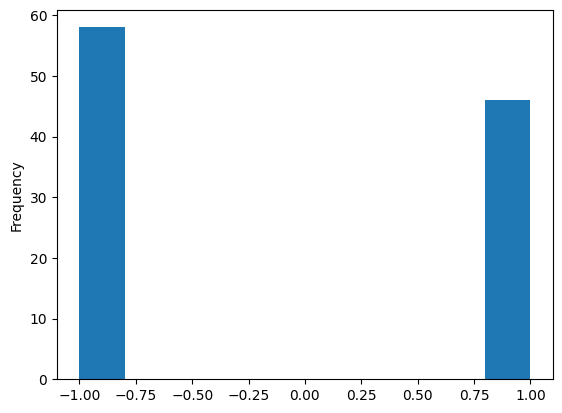

In [134]:
daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']
daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()
daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std']*1.5)
                                          else (-1 if (x['prediction_premium']<x['premium_std']*-1.5) else np.nan),
                                         axis=1)
daily_df['signal_daily'] = daily_df['signal_daily'].shift()
daily_df['signal_daily'].plot(kind='hist')
plt.show()

In [135]:
final_df = intraday_5min_df.reset_index().merge(daily_df[['signal_daily']].reset_index(),
                                                left_on='date',
                                                right_on='Date').set_index('datetime')
final_df = final_df.drop(['date', 'Date'], axis=1)
final_df['rsi'] = pandas_ta.rsi(close=final_df['close'],
                                length=20)
final_df['lband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,0]
final_df['uband'] = pandas_ta.bbands(close=final_df['close'],
                                     length=20).iloc[:,2]

final_df['signal_intraday'] = final_df.apply(lambda x:1 if (x['rsi']>70)&
                                                            (x['close']>x['uband'])
                                             else (-1 if (x['rsi']<30)&
                                                         (x['close']<x['lband']) else np.nan),
                                             axis=1)
final_df

,open,low,high,close,volume,signal_daily,rsi,lband,uband,signal_intraday
datetime,,,,,,,,,,
2021-09-29 20:00:00,10379.7775,10364.5950,10398.7025,10370.9575,46,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:05:00,10370.9425,10352.4175,10380.2500,10371.1450,53,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:10:00,10372.8150,10357.8250,10388.7500,10384.3125,116,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:15:00,10385.8275,10384.0825,10457.2000,10442.5175,266,NaN,NaN,NaN,NaN,NaN
2021-09-29 20:20:00,10442.5225,10426.2375,10448.0000,10440.9950,65,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-18 23:35:00,6708.0025,6705.5175,6712.0000,6708.8675,11,NaN,62.861699,6677.365065,6715.855435,NaN
2023-09-18 23:40:00,6708.8650,6707.1800,6714.2500,6709.3350,22,NaN,63.165869,6679.544207,6716.559793,NaN
2023-09-18 23:45:00,6709.9250,6704.3600,6713.5000,6708.2750,25,NaN,61.954798,6682.379916,6716.534084,NaN


In [136]:
final_df['return_sign'] = final_df.apply(lambda x: -1 if (x['signal_daily']==1)&(x['signal_intraday']==1)
                                             else (1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1) else np.nan),
                                             axis=1)
final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign'].transform(lambda x:x.ffill())
final_df['return'] = final_df['close'].pct_change()
final_df['forward_return'] = final_df['return'].shift(-1)
final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']

final_df[final_df['return_sign']==1]


,open,low,high,close,volume,signal_daily,rsi,lband,uband,signal_intraday,return_sign,return,forward_return,strategy_return
datetime,,,,,,,,,,,,,,
2021-10-18 06:05:00,15289.5750,15187.5025,15298.50,15195.9225,123,-1.0,28.087643,15260.606087,15573.801163,-1.0,1.0,-0.006133,0.002748,0.002748
2021-10-18 06:10:00,15185.0000,15154.0700,15256.00,15237.6775,139,-1.0,32.871717,15234.284165,15573.545585,NaN,1.0,0.002748,-0.003687,-0.003687
2021-10-18 06:15:00,15237.3800,15149.7525,15250.25,15181.5000,102,-1.0,30.041342,15196.881572,15586.846428,NaN,1.0,-0.003687,0.002871,0.002871
2021-10-18 06:20:00,15175.7325,15167.2325,15235.50,15225.0900,124,-1.0,34.638056,15174.727244,15589.987006,NaN,1.0,0.002871,0.001583,0.001583
2021-10-18 06:25:00,15225.3175,15221.3500,15298.50,15249.1850,80,-1.0,37.044929,15159.404901,15585.152849,NaN,1.0,0.001583,-0.000592,-0.000592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08 23:35:00,4596.0000,4570.0500,4602.50,4570.0500,5,-1.0,49.005009,4512.671542,4605.048458,NaN,1.0,-0.003608,-0.002155,-0.002155
2022-11-08 23:40:00,4581.5000,4560.2000,4581.50,4560.2000,7,-1.0,47.178936,4515.742826,4604.789674,NaN,1.0,-0.002155,0.000340,0.000340
2022-11-08 23:45:00,4560.2750,4553.4250,4572.25,4561.7500,103,-1.0,47.502965,4517.738395,4604.919105,NaN,1.0,0.000340,-0.000899,-0.000899


In [137]:
daily_return_df = final_df.groupby(pd.Grouper(freq='D'))[['strategy_return']].sum()
daily_return_df

,strategy_return
datetime,
2021-09-29,0.0
2021-09-30,0.0
2021-10-01,0.0
2021-10-02,0.0
2021-10-03,0.0
...,...
2023-09-14,0.0
2023-09-15,0.0
2023-09-16,0.0


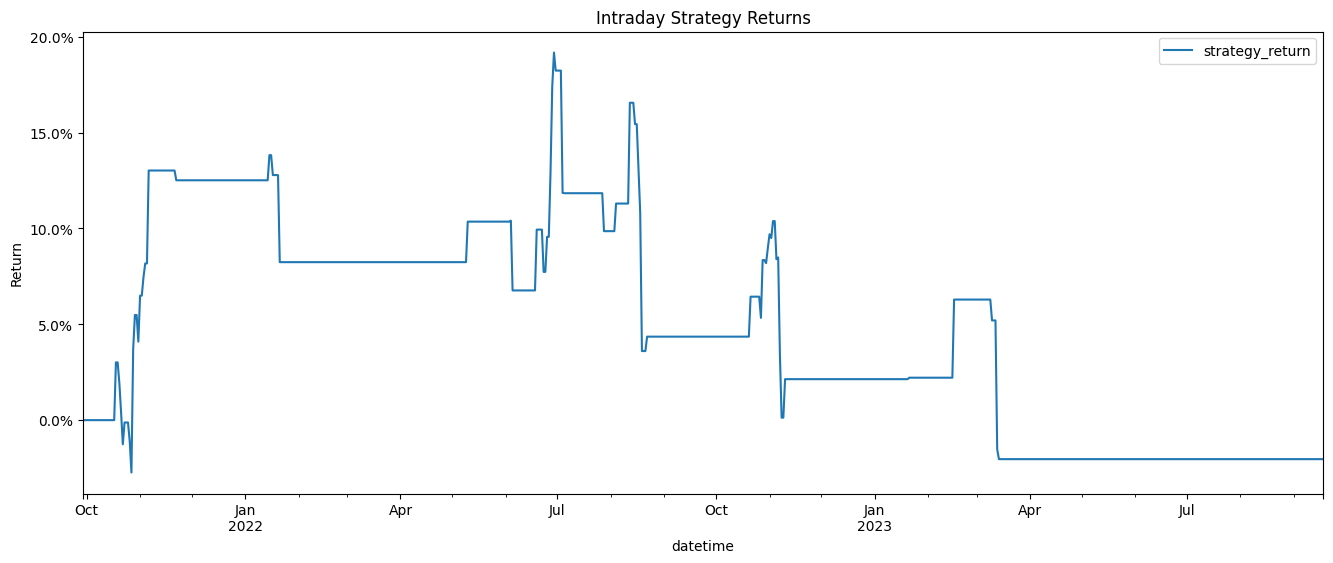

In [138]:
strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)
strategy_cumulative_return.plot(figsize=(16,6))
plt.title('Intraday Strategy Returns')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Return')
plt.show()